<h1># 🏘️ Porcentaje de Edificios Destinados a Viviendas Familiares</h1>

<p>Edificio: Toda construcción permanente, separada e independiente, concebida para ser utilizada como vivienda o para servir a fines agrarios, industriales, para la prestación de servicios o en general para el desarrollo de una actividad. No se censan los edificios dedicados en exclusiva a la actividad agraria.</p>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Configuración estética
sns.set(style="whitegrid")


In [5]:
import chardet #Libreria que sugiere que codificacion usar

with open('viviendas.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result['encoding'])


ISO-8859-1


Codificación	Cuándo usarla	Notas

'utf-8'	Codificación estándar moderna (recomendada):	Soporta todos los idiomas, caracteres universales. Ideal si el archivo no tiene errores.

'latin-1'	("ISO-8859-1"): Archivos en español o francés antiguo	Más permisiva, no lanza errores fácilmente.

'cp1252'	Similar a latin-1: pero con algunos símbolos adicionales.	Muy usada por Windows/Excel.

'utf-16':	Algunos archivos generados por Excel o Word.	Necesita más memoria, no muy común.


In [13]:
df = pd.read_csv('viviendas.csv', encoding='latin-1', sep=';')


In [35]:
df.head()

,Año,Tipo territorio,Código territorio,Territorio,Valor,Estado dato
0,2001,Comunidad de Madrid,NaN,Comunidad de Madrid,76.51,NaN
1,2001,Municipios,14.0,Acebeda (La),94.89,NaN
2,2001,Municipios,29.0,Ajalvir,57.37,NaN
3,2001,Municipios,35.0,Alameda del Valle,85.15,NaN
4,2001,Municipios,40.0,Álamo (El),95.43,NaN


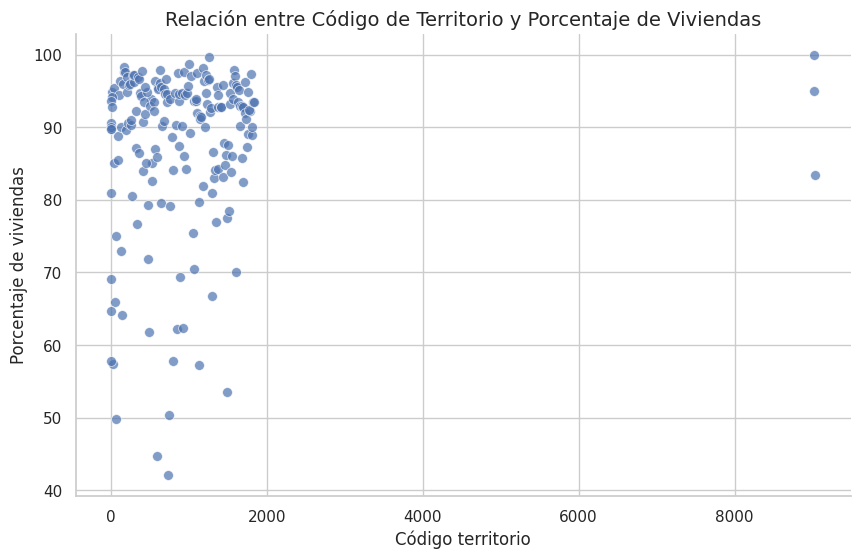

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Código territorio", y="Valor", s=50, alpha=0.7)
plt.title("Relación entre Código de Territorio y Porcentaje de Viviendas", fontsize=14)
plt.xlabel("Código territorio")
plt.ylabel("Porcentaje de viviendas")
sns.despine()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                191 non-null    int64  
 1   Tipo territorio    191 non-null    object 
 2   Código territorio  190 non-null    float64
 3   Territorio         191 non-null    object 
 4   Valor              191 non-null    float64
 5   Estado dato        0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.1+ KB


In [34]:
df.describe()

,Año,Código territorio,Valor,Estado dato
count,191.0,190.000000,191.000000,0.0
mean,2001.0,993.894737,87.712827,NaN
std,0.0,1163.166491,11.424216,NaN
min,2001.0,1.000000,42.120000,NaN
25%,2001.0,377.500000,84.580000,NaN
50%,2001.0,872.000000,92.090000,NaN
75%,2001.0,1373.500000,94.965000,NaN
max,2001.0,9036.000000,100.000000,NaN


In [15]:
df.isnull().sum()
df.duplicated().sum()
df.columns

Index(['Año', 'Tipo territorio', 'Código territorio', 'Territorio', 'Valor',
       'Estado dato'],
      dtype='object')

<h2>## 📊 Evaluación del Análisis de Viviendas
</h2>

Dataset: Porcentaje de edificios destinados principalmente a viviendas familiares

Fuente: Datos de Gobierno de España (datos.gob.es)

Ámbito temporal: Año 2001

Cobertura: Comunidad de Madrid, con detalle por municipios y zonas estadísticas.

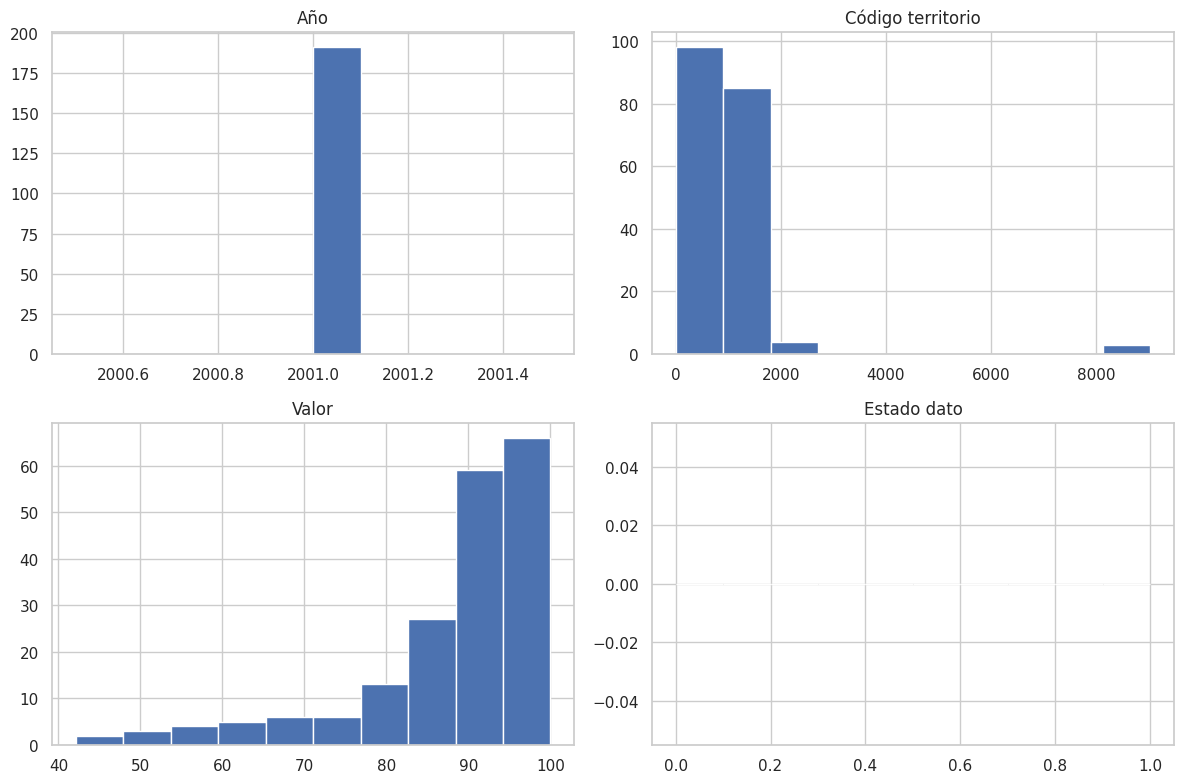

In [46]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Tipo territorio'>

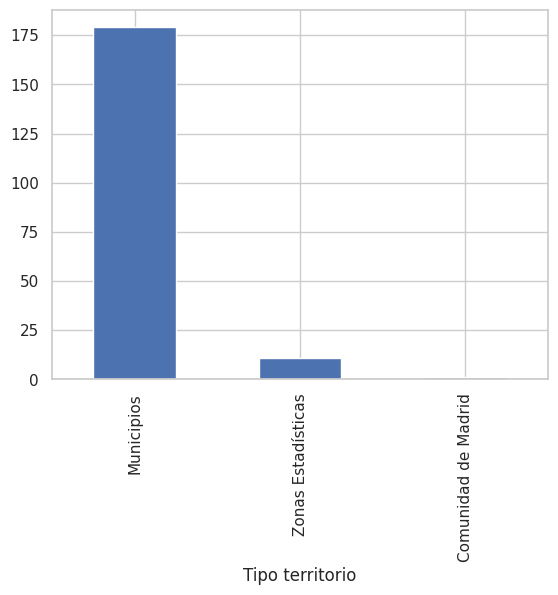

In [18]:
df['Tipo territorio'].value_counts().plot(kind='bar')

<h2>Análisis y resultados</h2>

1. A nivel Comunidad Autónoma

Porcentaje total: 76.51%

Analisis: Representa una visión general.

Interpretación: Cerca de 3 de cada 4 edificios están destinados principalmente a viviendas familiares.


2. A nivel de Municipios (179 registros)

Media: 88.06%

Mediana: 92.27%

Desviación estándar: 11.29%

Rango: 42.12% (mínimo) – 100% (máximo)

Conclusión:

- La mayoría de los municipios tienen una alta proporción de edificios residenciales.

- Sin embargo, algunos municipios presentan valores significativamente bajos, lo que puede indicar una fuerte presencia de sectores industriales, de servicios, o áreas rurales.

3. A nivel de Zonas Estadísticas (11 registros)

Media: 83.04%

Mediana: 89.82%

Desviación estándar: 13.05%

Rango: 57.76% – 94.24%

Conclusión:

- Mayor heterogeneidad que los municipios.

- Pueden reflejar zonas mixtas, con áreas tanto residenciales como industriales o de servicios.

In [20]:
print(df.groupby('Tipo territorio')['Valor'].mean())

Tipo territorio
Comunidad de Madrid    76.510000
Municipios             88.062682
Zonas Estadísticas     83.038182
Name: Valor, dtype: float64


In [41]:
df.groupby("Tipo territorio")["Valor"].describe()

,count,mean,std,min,25%,50%,75%,max
Tipo territorio,,,,,,,,
Comunidad de Madrid,1.0,76.510000,NaN,76.51,76.510,76.51,76.510,76.51
Municipios,179.0,88.062682,11.294362,42.12,85.085,92.27,95.265,100.00
Zonas Estadísticas,11.0,83.038182,13.051751,57.76,75.035,89.82,91.650,94.24


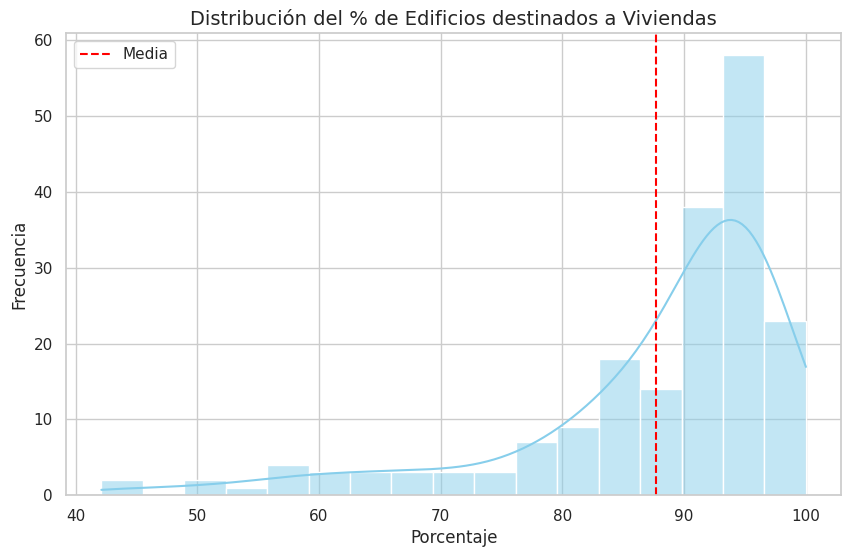

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Valor"], kde=True, color='skyblue')
plt.title("Distribución del % de Edificios destinados a Viviendas", fontsize=14)
plt.xlabel("Porcentaje")
plt.ylabel("Frecuencia")
plt.axvline(df["Valor"].mean(), color='red', linestyle='--', label='Media')
plt.legend()
plt.show()


Hallazgos principales

1. Distribución general del porcentaje residencial
Promedio nacional: 87.7%

- Máximo: 100%

- Mínimo: 42.1%

- Mediana: 92.1%

- Rango intercuartílico (IQR):

- Q1 (25%): 84.58%

- Q3 (75%): 94.97%

Interpretación:

La mayoría de los territorios tienen porcentajes residenciales altos, lo que indica que el uso de suelo predominantemente está enfocado a la vivienda familiar.

Sin embargo, la diferencia entre el mínimo (42%) y el máximo (100%) muestra que algunos territorios presentan una clara diversificación de usos (residencial + industrial/comercial/institucional).

🏅 Top 10 territorios con mayor porcentaje residencial

Estos territorios tienen porcentajes de entre 97% y 100%.

Representan zonas con homogeneidad residencial, ideales para:

- Proyectos de mejora de servicios vecinales.

- Diagnóstico de densidad poblacional.

- Implementación de planes de vivienda pública.

In [50]:


# Para mostrar todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Para mostrar el contenido completo de las celdas

top_territorios = df.sort_values(by="Valor", ascending=False).head(10)

display(top_territorios)

,Año,Tipo territorio,Código territorio,Territorio,Valor,Estado dato
77,2001,Municipios,9015.0,Lozoyuela-Navas-Sieteiglesias,100.00,NaN
123,2001,Municipios,1261.0,Robregordo,99.65,NaN
98,2001,Municipios,1006.0,Nuevo Baztán,98.69,NaN
17,2001,Municipios,170.0,Batres,98.25,NaN
113,2001,Municipios,1179.0,Prádena del Rincón,98.20,NaN
63,2001,Municipios,632.0,Gargantilla del Lozoya y Pinilla de Buitrago,97.96,NaN
154,2001,Municipios,1586.0,Valdemanco,97.90,NaN
39,2001,Municipios,395.0,Cervera de Buitrago,97.70,NaN
16,2001,Municipios,164.0,Atazar (El),97.65,NaN
93,2001,Municipios,941.0,Navalafuente,97.58,NaN


/tmp/ipython-input-48-3235843131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_territorios, y="Territorio", x="Valor", palette="Greens_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127941 (\N{SPORTS MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


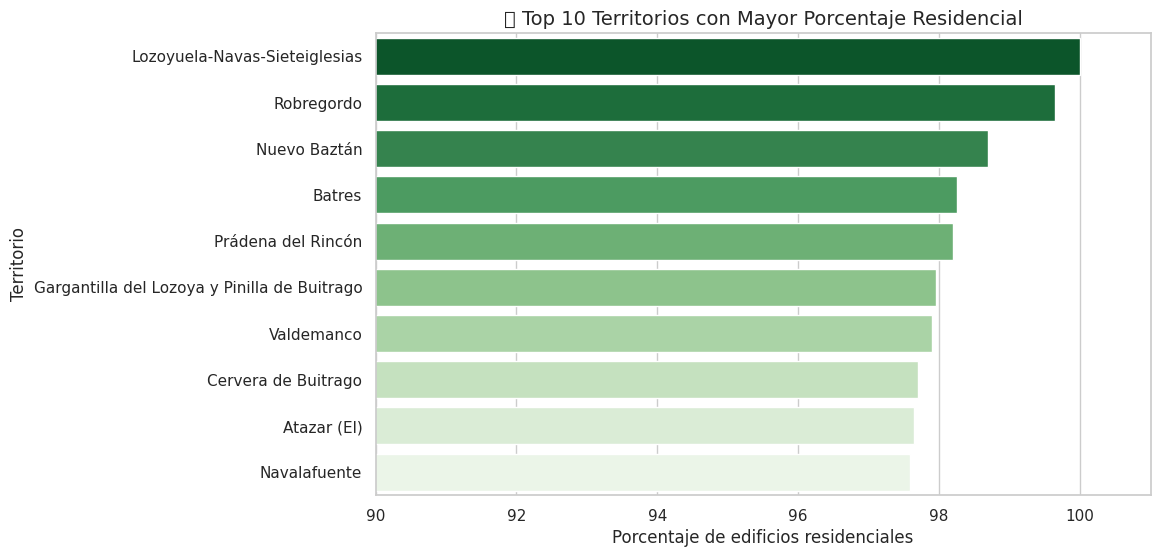

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_territorios, y="Territorio", x="Valor", palette="Greens_r")
plt.title("🏅 Top 10 Territorios con Mayor Porcentaje Residencial", fontsize=14)
plt.xlabel("Porcentaje de edificios residenciales")
plt.ylabel("Territorio")
plt.xlim(90, 101)
plt.show()


⚠️ Bottom 10 territorios con menor porcentaje residencial

Porcentajes por debajo del 70%, algunos incluso por debajo del 50%.

Alta posibilidad de que tengan:

- Uso mixto (residencial + comercial/industrial).

- Actividad económica intensa o presencia de infraestructuras que limitan la proporción residencial.

In [52]:
bottom_territorios = df.sort_values(by="Valor").head(10)
display(bottom_territorios)

,Año,Tipo territorio,Código territorio,Territorio,Valor,Estado dato
73,2001,Municipios,730.0,Humanes de Madrid,42.12,NaN
58,2001,Municipios,587.0,Fuenlabrada,44.71,NaN
7,2001,Municipios,72.0,Alcorcón,49.83,NaN
74,2001,Municipios,745.0,Leganés,50.42,NaN
143,2001,Municipios,1489.0,Torrejón de Ardoz,53.58,NaN
109,2001,Municipios,1132.0,Pinto,57.23,NaN
2,2001,Municipios,29.0,Ajalvir,57.37,NaN
79,2001,Municipios,796.0,Madrid,57.76,NaN
181,2001,Zonas Estadísticas,1.0,Municipio de Madrid,57.76,NaN
51,2001,Municipios,493.0,Coslada,61.76,NaN


/tmp/ipython-input-49-3164230263.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_territorios, y="Territorio", x="Valor", palette="Reds")


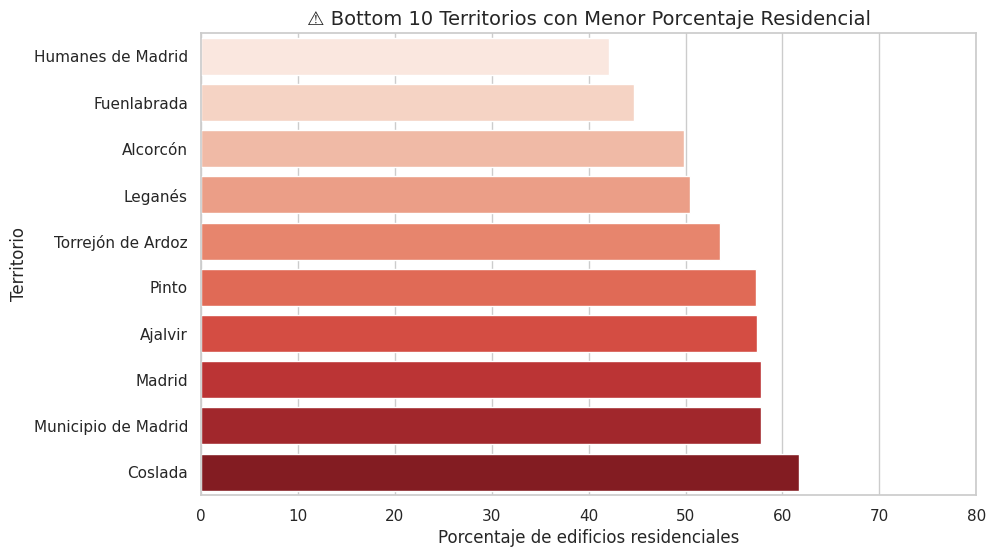

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_territorios, y="Territorio", x="Valor", palette="Reds")
plt.title("⚠️ Bottom 10 Territorios con Menor Porcentaje Residencial", fontsize=14)
plt.xlabel("Porcentaje de edificios residenciales")
plt.ylabel("Territorio")
plt.xlim(0, 80)
plt.show()


## 🎯 Oportunidades Derivadas

- **Optimizar uso del suelo**: Identificar territorios con baja proporción residencial para proponer desarrollos urbanos equilibrados.
- **Focalizar inversión pública**: Mejoras en transporte, salud, educación.
- **Diseño de políticas habitacionales**: Según nivel de saturación.
- **Estudios demográficos**: Facilita planificación de censos y recursos.

---

## 🧾 Conclusiones

### 🔹 Generales

- Patrón predominantemente residencial en la mayoría de los territorios.
- Diversidad de valores sugiere equilibrio entre zonas urbanas, mixtas y rurales.

### 🔸 Secundarias

- Segmentación útil para planeación territorial.
- Baja densidad residencial puede reflejar usos no habitacionales (industria, administración, etc.).
